In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
import TO_sim.Integrator_jit as IJ
from scipy.integrate import quad
from scipy.stats import norm

RK4_jit = IJ.RK4

In [2]:
K=9
m=6

In [861]:
def Bisection(f,r_a,r_b,eps =1e-5,end=30,arg=()):
    r_c = (r_a+r_b)/2
    num = 0 
    
    while abs(f(r_c,*arg))>eps:
        r_c = (r_a+r_b)/2
        if f(r_a,*arg)*f(r_c,*arg)>0:
            r_a = r_c
        else:
            r_b = r_c
        num+=1
        if num >end:
            # print('Please select another section')
            return np.NAN
    # print(f'count : {num}')
    return r_c

In [1354]:
def g_n(x):
    return norm.pdf(x,0,1)

def r_lock1(r,K=K,m=m,g=g_n):
    X = K*r
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return X*I_l

    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return X*I_l
    

def r_drift1(r,K=K,m=m,g=g_n):
    X = K*r
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    return -X/(m)*I_d

def r_main(r,K=K,m=m,g=g_n):
    rl = r_lock1(r,K=K,m=m,g=g_n)
    rd = 0#r_drift1(r,K=K,m=m,g=g_n)
    return rl+rd - r



def r_mean(r,K=K,m=m,g=g_n):
    rl = r_lock1(r,K=K,m=m,g=g_n)
    rd = r_drift1(r,K=K,m=m,g=g_n)
    return rl+rd - r

In [267]:
def r_lock1_test(r,K=K,m=m,g=g_n):
    X = K*r
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return X*I_l

    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return 0

In [268]:
# def g_sec(x,Or,Om):
#     g = norm.pdf(x,-Or,1)
#     dO = abs(Or-Om)
#     return np.where(x<dO,1e-9,g)

In [611]:
def g_sec(x,Or,Om):
    g = norm.pdf(x,-Or,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

In [525]:
r_lock1_test(0.1,K=K,m=m,g=g_n)

0.24268305329449802

In [608]:
def r_lock2(r,r_m,O_r,O_pm,K=K,m=m,g=g_sec):
    X = K*r
    shift = lambda x,X=X: -(K**2*r*r_m)/(2*(O_r+X*np.sin(x))**2)/m

    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x),O_r,O_pm)
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,epsabs=1e-10,limit=2000)
        return X*I_l

    else: 
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,epsabs=1e-10,limit=2000)
        return X*I_l    
def r_sec(r,r_m,O_r,O_pm,K=K,m=m,g=g_sec):
    rl = r_lock2(r,r_m,O_r,O_pm,K=K,m=m,g=g_sec)
    rd = 0#r_drift1(r,K=K,m=m,g=g_n)
    return rl+rd - r

In [720]:
def r_lock2(r,r_m,O_r,O_pm,K=K,m=m,g=g_sec):
    X = K*r
    shift = lambda x,X=X: -(K**2*r*r_m)/(2*(O_pm+X*np.sin(x))**2)/m -(K**2*r*r)/(8*(O_pm+X*np.sin(x))**2)/m 

    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x)+shift(0),O_r,O_pm)
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,epsabs=1e-10,limit=2000)
        return X*I_l

    else: 
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,epsabs=1e-10,limit=2000)
        return X*I_l    
def r_sec(r,r_m,O_r,O_pm,K=K,m=m,g=g_sec):
    rl = r_lock2(r,r_m,O_r,O_pm,K=K,m=m,g=g_sec)
    rd = 0#r_drift1(r,K=K,m=m,g=g_n)
    return rl+rd - r

In [630]:
Opf = lambda r,K=K,m=m:  (4/np.pi)*np.sqrt(K*r/m)
Odf = lambda r,K=K,m=m:  K*r

In [631]:
norm.pdf(160,0,1)

0.0

In [721]:
def A(r,K=K,m=m):
    return 1/np.sqrt(K*r*m)

def B(r,CS,CM,K=K,m=m):
    return (CS-CM)/(K*r)
def M_theta(r,CS,CM,K=K,m=m):
    a = A(r,K=K,m=m)
    b = B(r,CS,CM,K=K,m=m)
    return - a**2/(2*b**2)

In [722]:
K=5.5
m=6

In [731]:
r_m_ = Bisection(r_mean,0.1,1,arg = (K,m,g_n))
print(r_m_)
# O_pm = norm.ppf(r_mean/2+0.5)
# O_pm
# O_pm
print('K,m',K,m)
# print('O_pm',O_pm)

0.587353515625
K,m 5.5 6


In [732]:
r_m = Bisection(r_main,0.01,1,arg = (K,m,g_n))
print(r_m)
O_pm = norm.ppf(r_m/2+0.5)
O_r = quad(norm.ppf,r_m/2+0.5,1)[0]/(0.5-r_m/2)
# O_pm
# O_pm
print('K,m',K,m)
print('O_pm',O_pm)

0.6767575073242187
K,m 5.5 6
O_pm 0.9878165663727654


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_84208/4139402909.py:16: RuntimeWarning: invalid value encountered in arcsin
  theta_p = np.arcsin(A)


In [725]:
O_r = quad(norm.ppf,r_m/2+0.5,1)[0]/(0.5-r_m/2)
O_pm = norm.ppf(r_m/2+0.5)

In [726]:
O_r


1.5153862380330594

In [727]:
r_sec(0.1,r_m,O_r,O_pm,K,m,g_sec)

0.009692358758841668

In [729]:
r_s = Bisection(r_sec,0.001,1,eps=1e-4,arg = (r_m,O_r,O_pm,K,m,g_sec))
print(r_s)
O_ps = norm.ppf(r_m/2+r_s+0.5)
O_ps = quad(norm.ppf,r_m/2+0.5,r_m/2+r_s+0.5)[0]/(r_s)
shift =-(K**2*r_s*r_m)/(2*(O_ps)**2)/m
# shift2 =-(K**2*r_s*r_s)/(8*(O_ps)**2)/m
# O_pm = norm.ppf(r_m/2+0.5)
O_ps, O_pm+shift

count : 11
0.11172900390625


(1.2705767427378538, 0.8697460836184453)

In [699]:
def bs(a):
    a_ = 1.193
    b_ = 4*a/np.pi - 0.3056*a**3
    b = np.where((a<=a_)&(a>=0),b_,np.where(a<0,0,1))
    return b

def Il(b,a):
    BS = bs(a)
    b_ = np.where(abs(b)<BS,1,0)
    return b_
def G(b,r,g,O_r,K=K,arg=()):
    return b*r*g(K*r*b+O_r,*arg)
def zl(a,r,g,O_r,b_min,b_max,K=K,arg=()):
    integrand = lambda b:G(b,r,g,O_r,K,arg)*Il(b,a)*np.sqrt(1-b**2)
    result = quad(integrand,b_min,b_max)[0]
    return result
    

In [702]:
b_min = -3/K*r_m
b_max = 3/K*r_m
b_min,b_max

(-0.38608413696289057, 0.38608413696289057)

In [703]:
a = 1/np.sqrt(K*r_m*m)
zl(a,r_m,g_n,0,b_min,b_max,K=K)

0.0

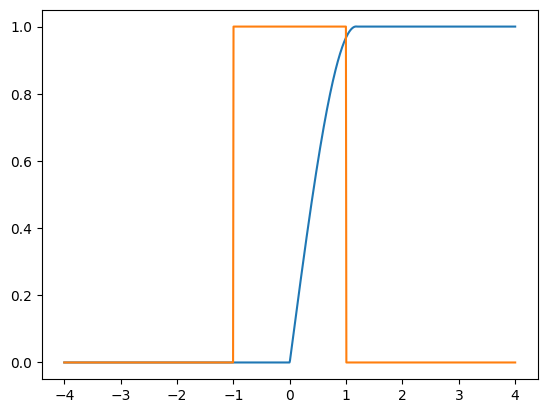

In [694]:
plt.plot(x,bs(x))
plt.plot(x,Il(x,a=2))

In [677]:
a = 1.193
4*a/np.pi - 0.3056*a**3

1.0000855178498491

In [593]:
O_pm-shift

1.1756034112576605

In [584]:
O_ps_max = norm.ppf(r_m/2+r_s+0.5)
O_ps_max

1.6440000197524882

In [555]:
shift

-0.11412270738686675

In [714]:
shift =-(K**2*r_s*r_m)/(2*(O_r)**2)/m
O_pm - shift

1.071363649893801

In [508]:
r_s*(1-r_m)/2

0.023237805101109177

In [509]:
r_s = 0.1

In [432]:
-(K**2*r_s*r_s)/(2*O_r**2)

-0.07282239209112239

In [656]:
-(K**2*0.1*r_m)/(2*O_r**2)/m

-0.09704598857906262

In [661]:
r_s = Bisection(r_sec,0.01,1,eps=1e-3,arg = (O_r,O_pm,K*(1-r_m)/2,m,g_sec))
print(r_s)
O_ps = norm.ppf(r_s/2+0.5)
# O_pm
# O_pm
print('K,m',K,m)
print('O_pm',O_ps)

TypeError: unsupported operand type(s) for /: 'float' and 'function'

In [77]:
def g_sec(x,Or,Om):
    g = norm.pdf(x+O_r,Or,1)
    dO = abs(Or-Om)
    return np.where(x<dO,1e-9,g)

In [90]:
def mean_omega(x):
    return norm.ppf(x)

In [120]:
O_r = quad(norm.ppf,0.5+r_m/2,1)[0]/(0.5-r_m/2)
O_r

1.572200088528785

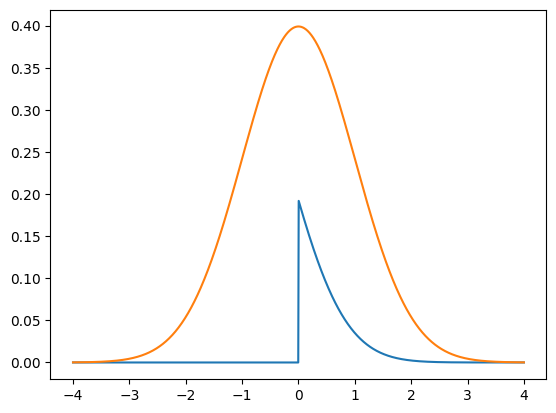

In [654]:
x = np.linspace(-4,4,1000)
plt.plot(x,g_sec(x,O_pm,O_pm))
plt.plot(x,g_n(x))

In [117]:
np.mean(g_n(x))

0.12486722322311221

In [119]:
quad(g_sec,-5,10,args=(O_r,O_pm),epsabs=1e-10,limit=2000)

(0.018494655364454927, 2.9779655068615964e-11)

In [51]:
import sympy as sy

In [53]:
x = sy.symbols('x')
sy.integrate(g_n_new,x)

c:\Users\kim9y\AppData\Local\Programs\Python\Python311\Lib\site-packages\sympy\concrete\expr_with_limits.py:26: SymPyDeprecationWarning: 

The string fallback in sympify() is deprecated.

To explicitly convert the string form of an object, use
sympify(str(obj)). To add define sympify behavior on custom
objects, use sympy.core.sympify.converter or define obj._sympy_
(see the sympify() docstring).

sympify() performed the string fallback resulting in the following string:

'<function g_n_new at 0x000001CA8990E8E0>'

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympify-string-fallback
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  function = sympify(function)


SympifyError: Sympify of expression 'could not parse '<function g_n_new at 0x000001CA8990E8E0>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

In [ ]:
def Ks_r_rs():

In [773]:
m = 5.5

In [775]:
r_mains = []
r_means = []
r_secs = []
O_maxs = [] 
O_rfs = []

shifts = [] 
counts = []
Ks = np.linspace(2,10,100)
for K in Ks:
    r_m,_ = Bisection(r_mean,0.1,1,arg = (K,m,g_n))
    r_0,_ = Bisection(r_main,0.1,1,arg = (K,m,g_n))
    r_means.append(r_m)
    r_mains.append(r_0)

    O_pm = norm.ppf(r_0/2+0.5)
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    O_maxs.append(O_pm)
    O_rfs.append(O_r)
    ### main cluster forming
    if ~np.isnan(r_m):
        r_s,count = Bisection(r_sec,0.001,0.5,eps=1e-4,end=30,arg = (r_m,O_r,O_pm,K,m,g_sec))
        O_ps = quad(norm.ppf,r_m/2+0.5,r_m/2+r_s+0.5)[0]/(r_s)
        shift =-(K**2*r_s*r_m)/(2*(O_ps)**2)/m
    else: 
        r_s,count = np.nan,np.nan
        O_ps = np.nan
        shift = np.nan
        
    
    r_secs.append(r_s)
    shifts.append(shift)
    counts.append(count)
    # shift2 =-(K**2*r_s*r_s)/(8*(O_ps)**2)/m
    # O_pm = norm.ppf(r_m/2+0.5)
    O_ps, O_pm+shift
# print('O_pm',O_pm)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_84208/4139402909.py:16: RuntimeWarning: invalid value encountered in arcsin
  theta_p = np.arcsin(A)


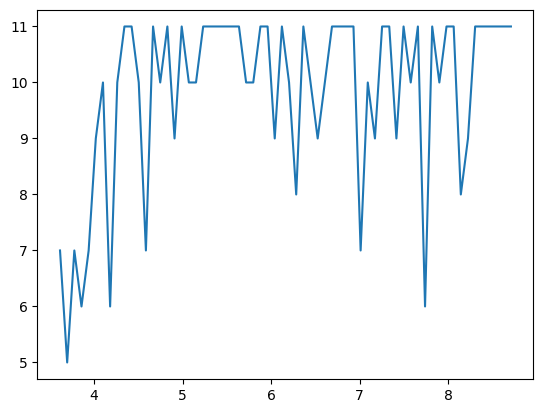

In [762]:
plt.plot(Ks,counts)

Text(0.5, 1.0, 'K=10.0,m=5.5')

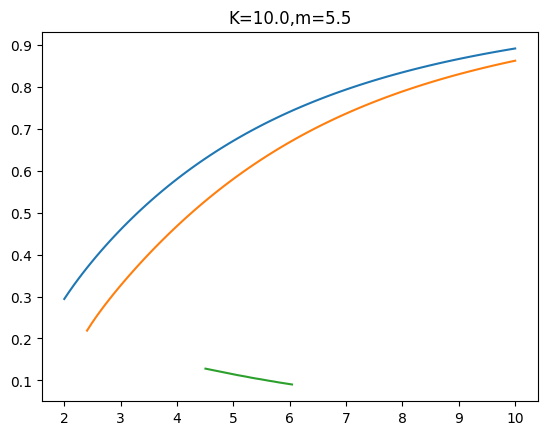

In [776]:
plt.plot(Ks,r_mains)
plt.plot(Ks,r_means)
plt.plot(Ks,r_secs)
plt.title(rf'm={m}')
# plt.plot(Ks,shifts)
# plt.plot(Ks,O_rfs)
# plt.plot(Ks,O_maxs)

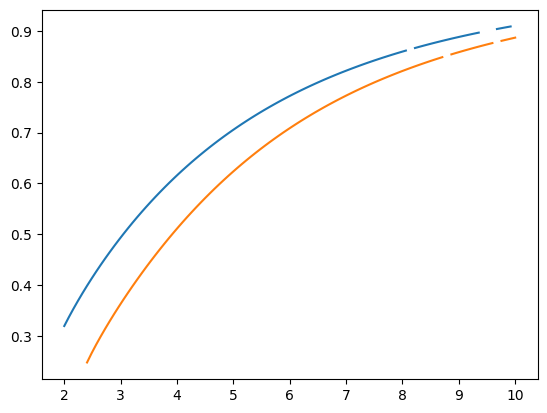

In [769]:
plt.plot(Ks,r_mains)
plt.plot(Ks,r_means)
plt.plot(Ks,r_secs)
# plt.plot(Ks,shifts)
# plt.plot(Ks,O_rfs)
# plt.plot(Ks,O_maxs)

In [752]:
r_sec

<function __main__.r_sec(r, r_m, O_r, O_pm, K=5.5, m=6, g=<function g_sec at 0x138fdf240>)>

In [1251]:
r_mains = []
r_means = []
r_secs = []
O_maxs = [] 
O_rfs = []

shifts = [] 
counts = []
ms = np.linspace(2,10,100)
K = 4
for m in ms:
    # r_m = Bisection(r_mean,0.1,1,arg = (K,m,g_n))
    r_0 = Bisection(r_main,0.1,1,arg = (K,m,g_n))
    # r_means.append(r_m)
    r_mains.append(r_0)

    O_pm = norm.ppf(r_0/2+0.5)
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    O_maxs.append(O_pm)
    O_rfs.append(O_r)
    ### main cluster forming
    if ~np.isnan(r_m):
        r_s = Bisection(r_sec,0.001,0.5,eps=1e-4,end=20,arg = (r_m,O_r,O_pm,K,m,g_sec))
        O_ps = quad(norm.ppf,r_m/2+0.5,r_m/2+r_s+0.5)[0]/(r_s)
        shift =-(K**2*r_s*r_m)/(2*(O_ps)**2)/m
    else: 
        r_s,count = np.nan,np.nan
        O_ps = np.nan
        shift = np.nan
        
    
    r_secs.append(r_s)
    shifts.append(shift)
    counts.append(count)
    # shift2 =-(K**2*r_s*r_s)/(8*(O_ps)**2)/m
    # O_pm = norm.ppf(r_m/2+0.5)
    O_ps, O_pm+shift
# print('O_pm',O_pm)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_84208/4139402909.py:16: RuntimeWarning: invalid value encountered in arcsin
  theta_p = np.arcsin(A)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_84208/61776189.py:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  I_l,err = quad(integrand_lock,-theta_p,theta_p,epsabs=1e-10,limit=2000)


In [1255]:
K,m

(4, 10.0)

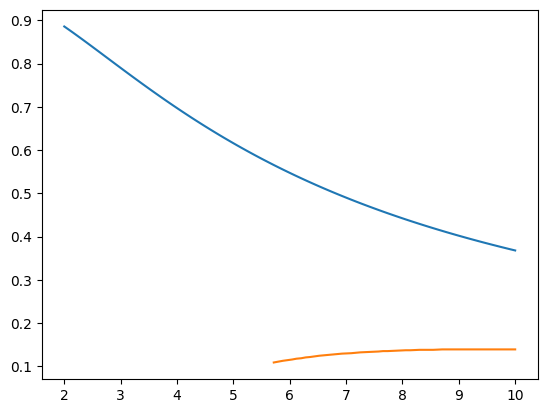

In [1254]:
plt.plot(ms,r_mains)
# plt.plot(ms,r_means)
plt.plot(ms,r_secs)
# plt.plot(Ks,shifts)
# plt.plot(Ks,O_rfs)
# plt.plot(Ks,O_maxs)

In [1356]:
def get_r_main(K,m,end=30):
    r_0 = Bisection(r_main,0.1,1,end=end,arg = (K,m,g_n))
    return r_0

def get_r_mean(K,m,end=30):
    r_0 = Bisection(r_mean,0.1,1,end=end,arg = (K,m,g_n))
    return r_0
def get_Or(r_0):
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    return O_r

r0_numpy = np.vectorize(get_r_main)
rm_numpy = np.vectorize(get_r_mean)
Or_numpy = np.vectorize(get_Or)

In [1363]:
r0_numpy = np.vectorize(get_r_main)
rm_numpy = np.vectorize(get_r_mean)

Or_numpy = np.vectorize(get_Or)

In [857]:
dK = 0.1
Ks= np.arange(2,10+dK/2,dK)

In [863]:
r_0s = rm_numpy(Ks,6)
# r_0s = rm_numpy(Ks,4)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_84208/4139402909.py:16: RuntimeWarning: invalid value encountered in arcsin
  theta_p = np.arcsin(A)


In [837]:
O_pms = norm.ppf(r_0s/2+0.5)
O_rs = Or_numpy(r_0s)
r_Ss = rs_numpy(Ks,6,r_0s)


### K vs r 그래프 그리는 방법

In [1347]:

def get_r_main(K,m,end=30):
    r_0 = Bisection(r_main,0.1,1,end=end,arg = (K,m,g_n))
    return r_0

def get_r_mean(K,m,end=30):
    r_0 = Bisection(r_mean,0.1,1,end=end,arg = (K,m,g_n))
    return r_0
def get_Or(r_0):
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    return O_r
def get_r_sec_old(K,m,r_0,end):
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    r_s = Bisection(r_sec,0.001,1-r_0,eps=1e-4,end=end,arg = (r_0,O_r,O_pm,K,m,g_sec))
    return r_s

def F_lock2(r,r_m,O_r,O_pm,K=K,m=m,g=g_sec):
    X = K*r
    shift = lambda x,X=X: -(K**2*r*r_m)/(2*(O_pm+X*np.sin(x))**2)/m -(K**2*r*r)/(8*(O_pm+X*np.sin(x))**2)/m 

    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x)+shift(0),O_r,O_pm)
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,epsabs=1e-10,limit=2000)
        return I_l

    else: 
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,epsabs=1e-10,limit=2000)
        return I_l    
    
def get_F_sec(r,K,m,r_0):
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    F_2 = F_lock2(r,r_0,O_r,O_pm,K,m,g_sec)
    return F_2
F_sec = np.vectorize(get_F_sec)

def get_r_sec(K,m,r_0):
    rs_u = np.nan
    rs_d = np.nan
    if np.isnan(r_0):
        return rs_u,rs_d
    r_2test = np.linspace(0,(1-r_0)/2,200)
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    Fs  = F_sec(r_2test,K,m,r_0)
    cross_point = np.sign((Fs[0:-1]-1/K)*(Fs[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)
    near_check = np.argmin(abs(Fs[:]-1/K))
    check_err = abs(Fs[near_check] - 1/K)<1e-3
    rs_u = np.nan
    rs_d = np.nan
    if len(arg_check)==2:
        r_ss = []
        for arg in arg_check:
            r_a = r_2test[arg]
            r_b = r_2test[arg+1]
            r_s = Bisection(r_sec,r_a,r_b,eps=5e-3,end=15,arg = (r_0,O_r,O_pm,K,m,g_sec))
            if np.isnan(r_s):
                r_s = (r_a+r_b)/2
            r_ss.append(r_s)
        rs_d,rs_u = r_ss
        return rs_u,rs_d
    elif len(arg_check)==1:
        for arg in arg_check:
            r_a = r_2test[arg]
            r_b = r_2test[arg+1]
            r_s = Bisection(r_sec,r_a,r_b,eps=5e-3,end=15,arg = (r_0,O_r,O_pm,K,m,g_sec))
            if np.isnan(r_s):
                r_s = (r_a+r_b)/2
        rs_u = r_s
        return rs_u,rs_d
    else:
        if check_err:
            r_a = r_2test[near_check] - 0.1
            r_b = r_2test[near_check] + 0.1
            r_s = Bisection(r_sec,r_a,r_b,eps=5e-3,end=15,arg = (r_0,O_r,O_pm,K,m,g_sec))
            print(r_s)
            rs_u = r_s
        return rs_u,rs_d


r0_numpy = np.vectorize(get_r_main)
rm_numpy = np.vectorize(get_r_mean)
Or_numpy = np.vectorize(get_Or)
rs_numpy = np.vectorize(get_r_sec)

In [1330]:
rs_numpy = np.vectorize(get_r_sec)

In [1331]:
r_Km = get_r_main(K,m,end=40)
r_2test = np.linspace(0.001,(1-r_Km)/2,50)

In [1328]:
K = 4
m = 6
r_Km = get_r_main(K,m,end=40)
r_2test = np.linspace(0,(1-r_Km)/2,100)
O_pm = norm.ppf(r_Km/2+0.5)
O_r = quad(norm.ppf,r_Km/2+0.5,1)[0]/(0.5-r_Km/2)
Fs  = F_sec(r_2test,K,m,r_Km)
cross_point = np.sign((Fs[0:-1]-1/K)*(Fs[1:]-1/K))*(-0.5) + 0.5
arg_check, = np.where(cross_point)
near_check = np.argmin(abs(Fs[:]-1/K))
check_err = abs(Fs[near_check] - 1/K)<1e-3
rs_u = np.nan
rs_d = np.nan

if len(arg_check)==2:
    r_ss = []
    for arg in arg_check:
        r_a = r_2test[arg]
        r_b = r_2test[arg+1]
        r_s = Bisection(r_sec,r_a,r_b,eps=1e-2,end=15,arg = (r_Km,O_r,O_pm,K,m,g_sec))
        if np.isnan(r_s):
            r_s = (r_a+r_b)/2
        r_ss.append(r_s)
    rs_u,rs_d = r_ss 
elif len(arg_check)==1:
    r_ss = []
    for arg in arg_check:
        r_a = r_2test[arg]
        r_b = r_2test[arg+1]
        r_s = Bisection(r_sec,r_a,r_b,eps=1e-2,end=15,arg = (r_Km,O_r,O_pm,K,m,g_sec))
        if np.isnan(r_s):
            r_s = (r_a+r_b)/2
    rs_u = r_s
else:
    if check_err:
        r_a = r_2test[near_check] - 0.1
        r_b = r_2test[near_check] + 0.1
        r_s = Bisection(r_sec,r_a,r_b,eps=1e-2,end=15,arg = (r_Km,O_r,O_pm,K,m,g_sec))
        # print(r_s)
        rs_u = r_s

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_84208/112284873.py:8: RuntimeWarning: invalid value encountered in double_scalars
  A = omega_p/X


In [1364]:
if np.isnan(np.nan):
    print('asdfas')

asdfas


In [1281]:
np.isnan(np.nan)

True

In [1299]:
F_lock2(rs_u,r_Km,O_r,O_pm,K=K,m=m,g=g_sec)

0.2513092221740275

In [34]:
r_0s = rm_numpy(Ks,4.4)
r_d,r_u = rs_numpy(Ks,4.4,r_0s)
get_r_sec_old()

NameError: name 'rm_numpy' is not defined

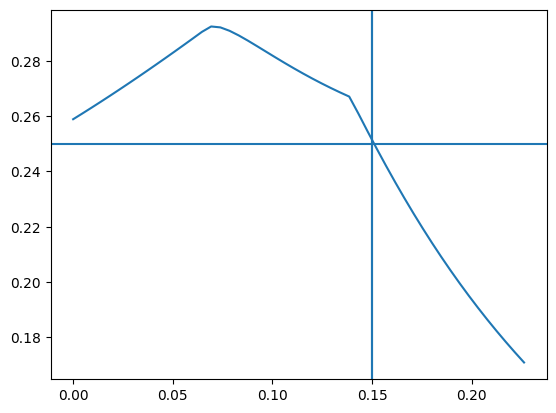

In [1295]:
plt.axhline(1/K)
plt.plot(r_2test,Fs)
plt.axvline(rs_u)
plt.axvline(rs_u)
plt.axvline(rs_d)

In [ ]:
get_r_sec()

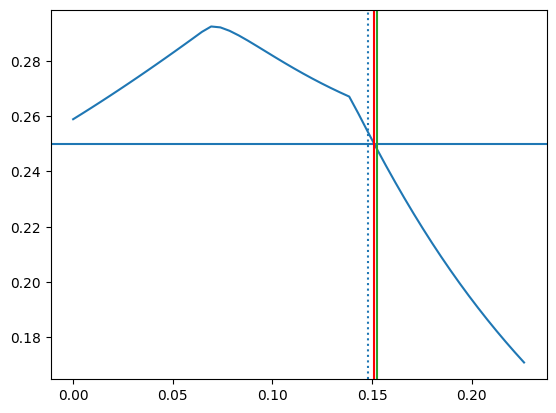

In [1296]:
plt.axhline(1/K)
# plt.plot(r_2test,abs(Fs-1/K))
plt.plot(r_2test,Fs)
for arg in arg_check:
    r_a = r_2test[arg]
    r_b = r_2test[arg+1]
    plt.axvline(r_a,ls=':')
    plt.axvline(r_b,color = 'tab:green')
    r_s = Bisection(r_sec,r_a,r_b,eps=1e-4,end=15,arg = (r_Km,O_r,O_pm,K,m,g_sec))
    plt.axvline(r_s,color='red')

# plt.axvline(*r_2test[arg_check+1])
# plt.axhline(0)

In [1381]:
Ks = np.arange(0.1,10+0.05,0.1)
ms = np.arange(0.1,10+0.05,0.1)

In [1382]:
df = pd.DataFrame({'K':[],'m':[],'r_mean':[],'r_main':[],'r_sec_Down':[],'r_sec_Up':[]})

In [1383]:
df = df.set_index(['K','m'])

In [1389]:
import warnings
from tqdm.notebook import tqdm_notebook as tqdm
warnings.filterwarnings(action='ignore')

In [1391]:
for m in tqdm(ms):
    r_0s = r0_numpy(Ks,m)
    r_ms = rm_numpy(Ks,m)
    rs_d,rs_u = rs_numpy(Ks,m,r_0s)
    for K,r0,rm,rsd,rsu in zip(Ks,r_0s,r_ms,rs_d,rs_u):
        df.loc[(K,m),'r_mean'] = rm
        df.loc[(K,m),'r_main'] = r0
        df.loc[(K,m),'r_sec_Up'] = rsu
        df.loc[(K,m),'r_sec_Down'] = rsd

  0%|          | 0/100 [00:00<?, ?it/s]

0.100535744114926
0.07248591372841287
0.07682912726151311
0.06694143194901317
0.10773829409950655
0.06042769582648022
0.05884913394325658
0.11312304045024671
0.05486803556743422
0.10670904862253286
0.05008898283305921
0.04705762361225327
0.04594308953536188
0.040651582416735166
0.04332371761924342
0.10519120065789475
0.04097322162828945
0.038848234477796034
0.03691406250000001
0.036133454975328966
0.03516203227796055
0.03443346525493421
0.10328955399362663
0.08508622018914472
0.09157682719983554
0.0736315275493421
0.05984224018297698


In [1393]:
df.sort_index()#.to_excel(f'N = {N} seed = {seed} dt = {dt} win {K_end} TLO.xlsm')

,,r_mean,r_main,r_sec_Down,r_sec_Up
K,m,,,,
0.1,5.0,NaN,NaN,NaN,NaN
0.2,5.0,NaN,NaN,NaN,NaN
0.3,5.0,NaN,NaN,NaN,NaN
0.4,5.0,NaN,NaN,NaN,NaN
0.5,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9.6,5.0,0.618500,0.701447,0.098208,NaN
9.7,5.0,0.623334,0.705319,0.096934,NaN
9.8,5.0,0.628113,0.709109,0.095688,NaN


(0.0, 1.0)

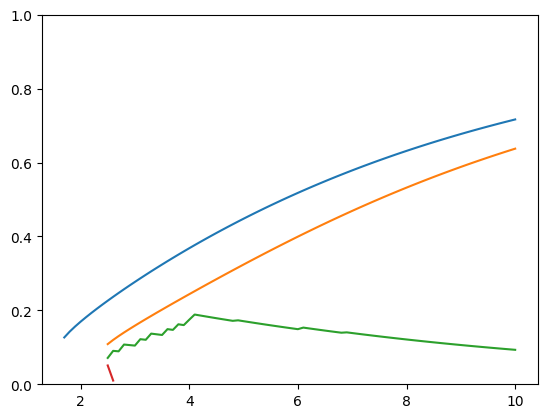

In [1392]:
plt.plot(Ks,r_0s)
plt.plot(Ks,r_ms)
plt.plot(Ks,rs_d)
plt.plot(Ks,rs_u)
plt.ylim(0,1)

### Phase diagram with parmap

In [1]:
from TO_sim.analytical.sec_order_parameter import make_r_rsec as MR
from parmap import parmap
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [2]:
m_set = []
core = 8
index_ = 0
Ks = np.arange(0.1,10+0.05,0.1)
ms = np.arange(0.1,10+0.05,0.1)

for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
core_set = [len(ms) for ms in m_set]

In [6]:
df = pd.DataFrame({'K':[],'m':[],'r_mean':[],'r_main':[],'r_sec_Down':[],'r_sec_Up':[]})
df = df.set_index(['K','m'])


In [7]:
m,Ks,r_0s,r_ms,rs_d,rs_u

(0.1,
 array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. ]),
 array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan, 0.42541504, 0.562854  , 0.65178833, 0.71517944,
        0.76258545, 0.79914246, 0.827954

In [8]:
for core,ms in tqdm(list(zip(core_set,m_set))):
    for m,Ks,r_0s,r_ms,rs_d,rs_u in parmap.map(MR,ms,Ks=Ks,pm_pbar=False, pm_processes=core):
        for K,r0,rm,rsd,rsu in zip(Ks,r_0s,r_ms,rs_d,rs_u):
            df.loc[(K,m),'r_mean'] = rm
            df.loc[(K,m),'r_main'] = r0
            df.loc[(K,m),'r_sec_Up'] = rsu
            df.loc[(K,m),'r_sec_Down'] = rsd



  0%|          | 0/13 [00:00<?, ?it/s]

0.1098072454557946
0.11016706150380812
0.11006630748959637
0.07186983961555823
0.06984075038277324
0.0627013623414926
0.061006279566779176
0.055177866873429626
0.05148709551173836
0.04704480961938598
0.10425349096557004
0.10796634539886937
0.04423080521013273
0.0420537593975738
0.04109397389780937
0.039772164042870595
0.03919841823865422
0.03718671942476054
0.036125696843592986
0.03564925457364951
0.03469084926586058
0.034246013392156084
0.09917259024615263
0.09357177120956345
0.08652423494425251
0.07463802165122488
0.07490853927842336


In [10]:
df.sort_index().to_excel(f'Order parameter and secondary cluster.xlsm')

In [9]:
pd.read_excel('Order parameter and secondary cluster.xlsm',axis=[0,1])

TypeError: read_excel() got an unexpected keyword argument 'axis'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# df_01 = pd.read_excel('N = 500 seed = 10 dt = 0.1 230720 ver3.xlsm',index_col=[0,1])
# df_01 = pd.read_excel('N = 500 Q_Normal seed = 10 dt = 0.1 230821 ver3.xlsm',index_col=[0,1])
# df_01 = pd.read_excel('TLO/N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])

re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()

In [ ]:
Ks

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [ ]:
df = df.copy()
S = df['c0'].unstack().to_numpy()
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']

df_new = df.copy()
re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()
for m in ms:
    for K in Ks:
        temp_o = df.loc[(K,m)][c_o].dropna().to_numpy(dtype = float)
        temp_s = df.loc[(K,m)][c_s].dropna().to_numpy(dtype = float)
        o10 = temp_o[temp_s>10]
        s10 = temp_s[temp_s>10]
        num_p = 0
        num_m = 0
        if len(o10) != 0:
            if abs(o10[0])<0.5:
                df_new.loc[(K,m),'main_s'] = s10[0]
                df_new.loc[(K,m),'main_o'] = o10[0]
                o_c10 = o10[1:]
                s_c10 = s10[1:]
            else:
                o_c10 = o10[:]
                s_c10 = s10[:]
            if len(o_c10) != 0:            
                argsort = np.argsort(s_c10)[::-1]
                for i,tempo in enumerate(o_c10[argsort]):
                    if abs(tempo)<2.5:
                        if tempo > 0:
                            df_new.loc[(K,m),f'p_s_{num_p}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'p_o_{num_p}'] = o_c10[argsort[i]]
                            num_p +=1
                        else:
                            df_new.loc[(K,m),f'm_s_{num_m}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'm_o_{num_m}'] = o_c10[argsort[i]]
                            num_m +=1

        # if abs(temp_o[argmain]) <0.5:
        #     df_new.loc[(K,m),'main_s'] = temp_s[argmain]
        #     df_new.loc[(K,m),'main_o'] = temp_o[argmain]


        # else: prinT()

In [12]:
df_new = df.reset_index()

In [14]:
df.columns

Index(['r_mean', 'r_main', 'r_sec_Down', 'r_sec_Up'], dtype='object')

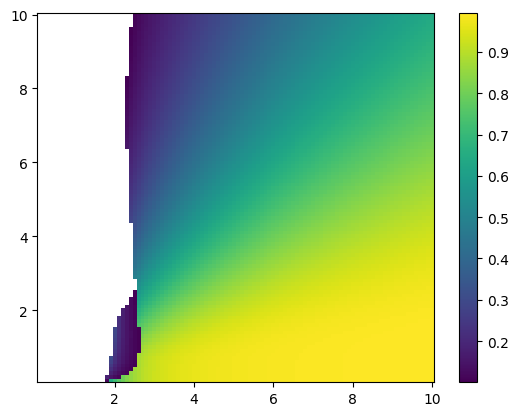

In [16]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
plt.pcolormesh(KK,MM,df['r_mean'].unstack().to_numpy().T)
plt.colorbar()
# plt.xlim(1,3)

In [ ]:
d

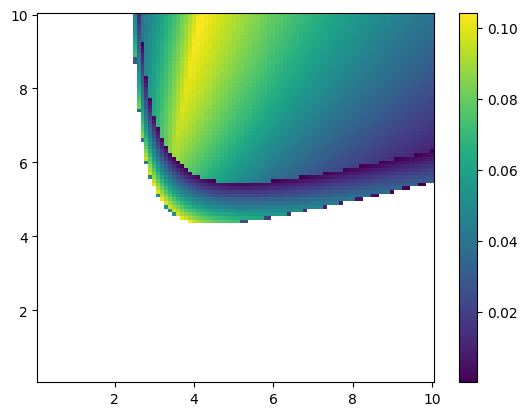

In [20]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df['r_sec_Down'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df['r_sec_Up'].unstack().to_numpy().T)

Z =df_new['main_s'].unstack().to_numpy().T/N
norm = colors.Normalize(vmin=np.nanmin(Z),vmax=np.nanmax(Z))
CS = plt.contourf(KK,MM,Z,20,norm=norm,cmap='viridis')
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS_ = plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T/500,cmap='viridis',alpha=1)

plt.colorbar()

NameError: name 'to_draw' is not defined

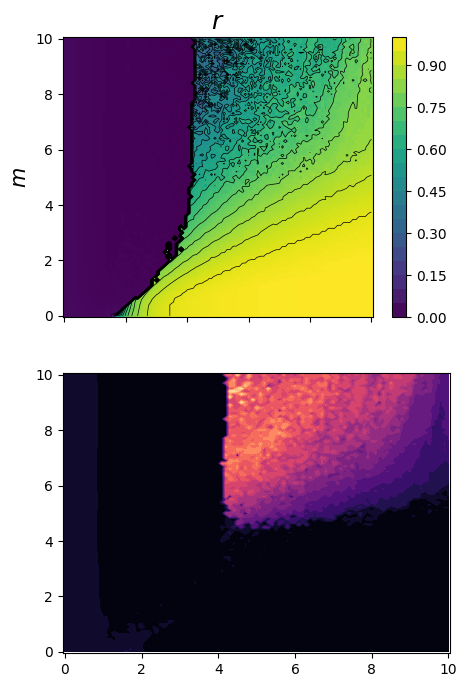

In [ ]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axr,axrstd)= plt.subplots(2,1,sharex=True,sharey=True,dpi=100,figsize=(5,8))

plt.sca(axr)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
To_show = df_new.unstack()['r'].to_numpy().T
CS = plt.contourf(KK,MM,To_show, 20, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='black',linewidths = 0.5, origin=origin)
plt.pcolormesh(KK,MM,To_show)
plt.colorbar(CS)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r$',fontsize=18)

plt.sca(axrstd)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
CS = plt.contourf(KK,MM,df_new['rstd'].unstack().to_numpy().T,20,cmap='magma')
CS = plt.contourf(KK,MM,to_draw, lev, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.hexbin(KK,MM,df_new['rstd'].unstack().to_numpy().T,cmap='magma',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r(t)$ std.',fontsize=18)
plt.colorbar(CS)

# plt.xlabel(r'$K$',fontsize=15)


plt.tight_layout()


In [ ]:
import matplotlib.colors as colors

In [ ]:
N =500

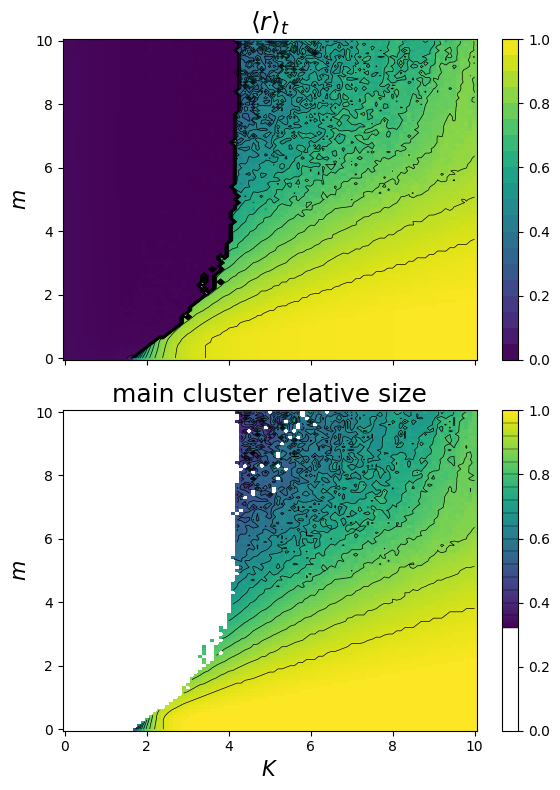

In [ ]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axr,axmain)= plt.subplots(2,1,sharex=True,sharey=True,dpi=100,figsize=(6,8))

plt.sca(axr)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
To_show = df_new.unstack()['r'].to_numpy().T
CS = plt.contourf(KK,MM,To_show, 20, origin=origin,vmax=1,vmin=0)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='black',linewidths = 0.5, origin=origin)
CS_ = plt.pcolormesh(KK,MM,To_show,vmax=1)
cbar_ = plt.colorbar(CS)
cbar_.set_ticks([0.0,0.20,0.40,0.60,0.80,1.00])
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$\langle$$r$$\rangle$$_t$',fontsize=18)

plt.sca(axmain)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
Z =df_new['main_s'].unstack().to_numpy().T/N
norm = colors.Normalize(vmin=np.nanmin(Z),vmax=np.nanmax(Z))
CS = plt.contourf(KK,MM,Z,20,norm=norm,cmap='viridis')
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS_ = plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T/500,cmap='viridis',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title('main cluster relative size',fontsize=18)
cbar = plt.colorbar(CS_)
cbar.set_ticks([0,0.2,0.4,0.6,0.8,1.0])
for i in CS.levels[::]:
    cbar.ax.axhline(i,0,1,color ='k',alpha=1,lw=0.3)

# plt.xlabel(r'$K$',fontsize=15)


plt.tight_layout()
plt.savefig('2n1 relative Q_Normal.png',dpi=400,transparent=True)


In [ ]:
np.nanmin(df_new['main_s'].unstack().to_numpy().T)

161.0

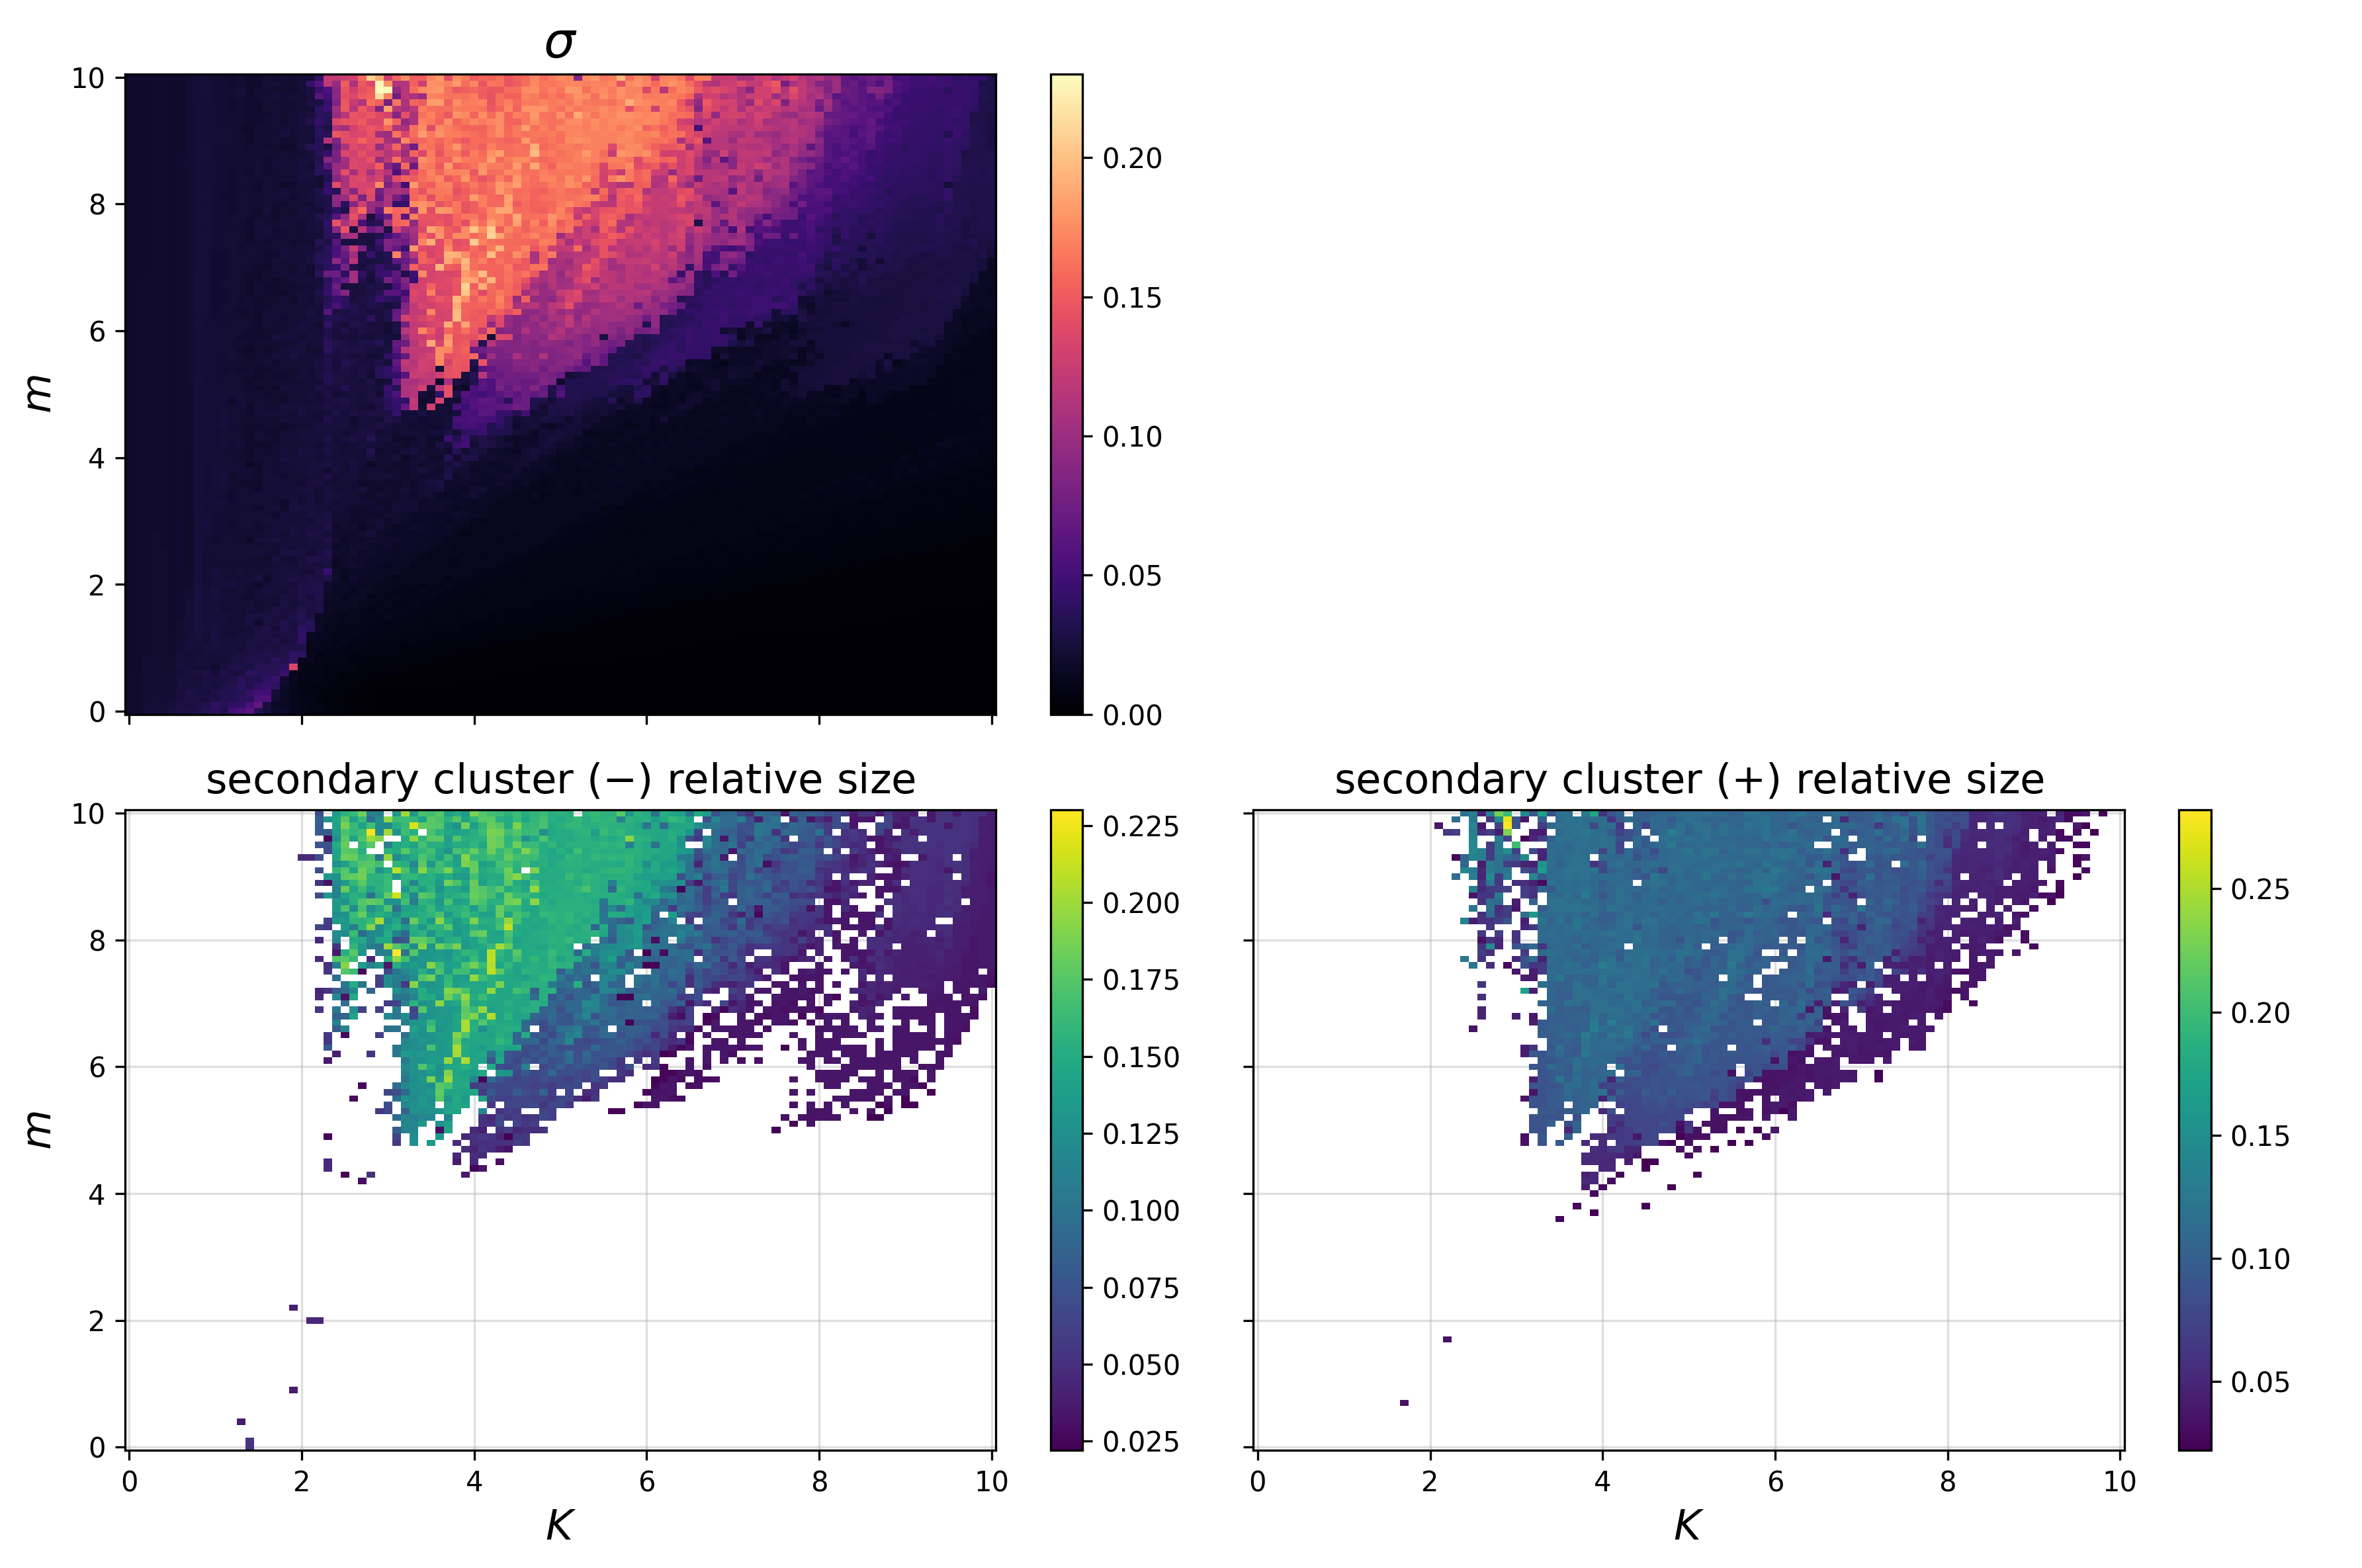

In [ ]:
origin = 'lower'
fig,((axrstd,ax2nd),(ax2ndm,ax2ndp))= plt.subplots(2,2,sharex=True,sharey=True,dpi=300,figsize=(12,8))

plt.sca(axrstd)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
# CS = plt.contourf(KK,MM,df_new['rstd'].unstack().to_numpy().T,20,cmap='magma')

# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,df_new['rstd'].unstack().to_numpy().T,cmap='magma',alpha=1)
# plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$\sigma$',fontsize=18)
plt.colorbar(CS)

plt.sca(ax2ndp)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
P_= df_new['p_s_0'].unstack().to_numpy().T/500
# CS = plt.contourf(KK,MM,P_,20,cmap='magma')
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,P_,cmap='viridis',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.gca().set_axisbelow(True)

plt.grid(zorder=0,alpha=0.4)
plt.title(r'secondary cluster $(+)$ relative size',fontsize=15)
plt.colorbar(CS)


plt.sca(ax2ndm)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
M_= df_new['m_s_0'].unstack().to_numpy().T/500
# CS = plt.contourf(KK,MM,M_,20,cmap='viridis')
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,M_,cmap='viridis',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
plt.title(r'secondary cluster $(-)$ relative size',fontsize=15)
plt.colorbar(CS)#.set_ticks([0.05,0.10,0.15,0.20])


sum_ = np.nansum(np.dstack((P_,M_)),2)
sum_ = np.where(sum_==0,np.nan,sum_)
plt.sca(ax2nd)
# KK = df_01.index.to_frame().K.unstack().to_numpy().T
# MM = df_01.index.to_frame().m.unstack().to_numpy().T
# m_= df_new['m_s_0'].unstack().to_numpy().T
# # CS = plt.contourf(KK,MM,sum_,20,cmap='viridis',alpha=0)
# # CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
# plt.gca().set_axisbelow(True)
# plt.grid(zorder=0,alpha=0.4)
# CS= plt.pcolormesh(KK,MM,sum_,cmap='viridis',alpha=1,zorder=1)
# # plt.xlabel(r'$K$',fontsize=15)
# # plt.ylabel(r'$m$',fontsize=15)
# plt.title(r'secondary cluster size $(+)+(-)$',fontsize=18)
# plt.colorbar(CS)

# ax.axis('off')
plt.gca().axis('off')
plt.tight_layout()
# plt.savefig('2n2 2 relative Q_Normal.png',dpi=400,transparent=True)

,K,m,r_mean,r_main,r_sec_Down,r_sec_Up
0,0.1,0.1,NaN,NaN,NaN,NaN
1,0.2,0.1,NaN,NaN,NaN,NaN
2,0.3,0.1,NaN,NaN,NaN,NaN
3,0.4,0.1,NaN,NaN,NaN,NaN
4,0.5,0.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
9995,9.6,10.0,0.618500,0.701447,0.097142,NaN
9996,9.7,10.0,0.623334,0.705319,0.096623,NaN
9997,9.8,10.0,0.628113,0.709109,0.095380,NaN
9998,9.9,10.0,0.632837,0.712845,0.094155,NaN


,r_sec_Down,K,m
4338,0.107769,3.9,4.4
4339,0.105386,4.0,4.4
4340,0.103062,4.1,4.4
4341,0.099996,4.2,4.4
4342,0.097043,4.3,4.4
...,...,...,...
9995,0.097142,9.6,10.0
9996,0.096623,9.7,10.0
9997,0.095380,9.8,10.0
9998,0.094155,9.9,10.0


### Find Critical m

In [10]:

from TO_sim.analytical.sec_order_parameter import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [11]:
df = pd.read_excel('Order parameter and secondary cluster.xlsm',index_col=[0,1])

In [22]:
df.columns

Index(['r_mean', 'r_main', 'r_sec_Down', 'r_sec_Up'], dtype='object')

In [31]:
df_new  = df.reset_index()
df_new[['r_mean','r_sec_Down','K','m']].dropna().sort_values(by=['m','K']).query('m<=4.4')

,r_mean,r_sec_Down,K,m
3843,0.556372,0.107769,3.9,4.4
3943,0.569528,0.105386,4.0,4.4
4043,0.582272,0.103062,4.1,4.4
4143,0.594604,0.099996,4.2,4.4
4243,0.606552,0.097043,4.3,4.4
4343,0.618088,0.094936,4.4,4.4
4443,0.629266,0.092151,4.5,4.4
4543,0.640088,0.089471,4.6,4.4
4643,0.650525,0.086183,4.7,4.4
4743,0.660660,0.083697,4.8,4.4


In [3]:
Ks = np.arange(0.1,10+0.05,0.1)
ms = np.arange(0.1,10+0.05,0.1)

In [36]:
r0_numpy
rm_numpy
Or_numpy
rs_numpy

In [26]:
r_0s = r0_numpy(Ks,4.4)
r_d,r_u = rs_numpy(Ks,4.4,r_0s,samples=40)

0.07273794320913457
0.07068434495192308


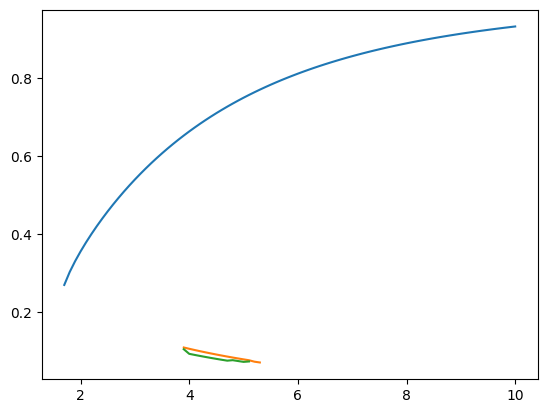

In [27]:
plt.plot(Ks,r_0s)
plt.plot(Ks,r_d)
plt.plot(Ks,r_u)